In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import io
%cd "C:\Users\sadin\Desktop\IMARTICUS\PYTHON\DATA SETS\VACCINE"

C:\Users\sadin\Desktop\IMARTICUS\PYTHON\DATA SETS\VACCINE


In [3]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [4]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [5]:
vaccinelables=pd.read_csv("training_set_labels.csv")

In [6]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

# EDA

In [8]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

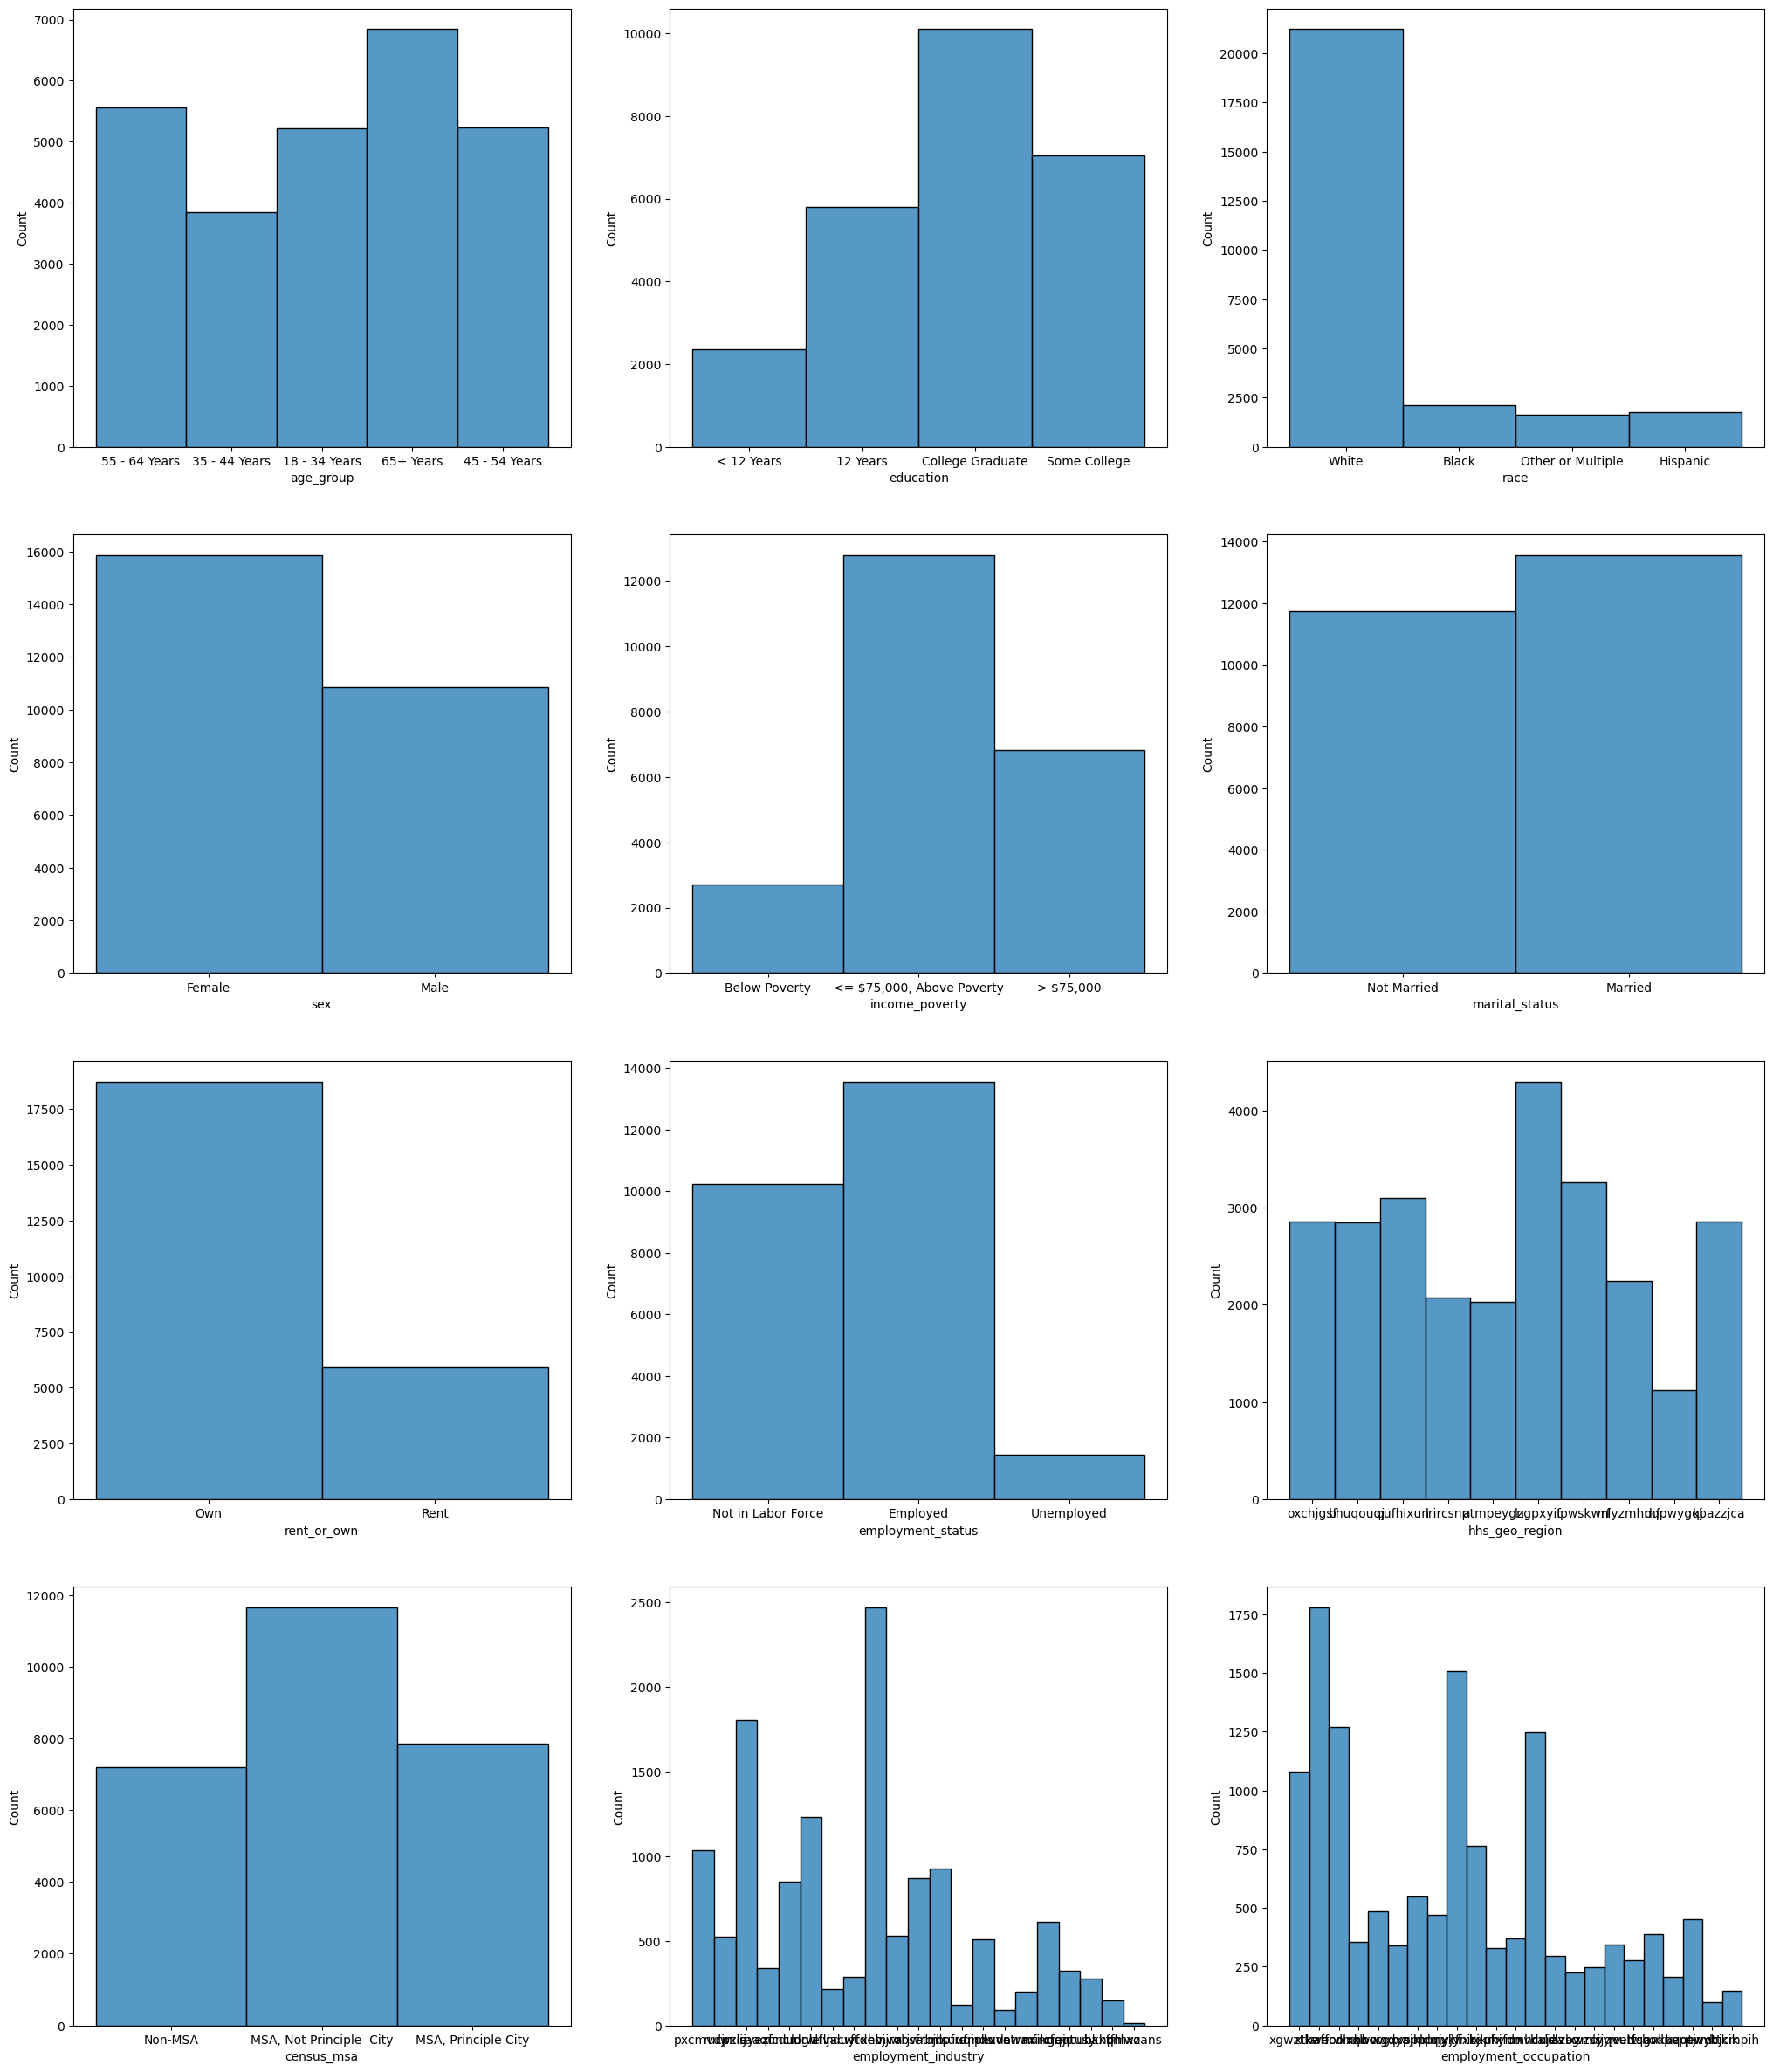

In [11]:
categorical=[]
for column in vaccinetrain:
    if is_string_dtype(vaccinetrain[column]):
        categorical.append(column)
fig , ax=plt.subplots(nrows = 4, ncols = 3, figsize=(25,30))
for variable, subplot in zip(categorical, ax.flatten()):
        sns.histplot(vaccinetrain[variable], ax = subplot)
plt.show()


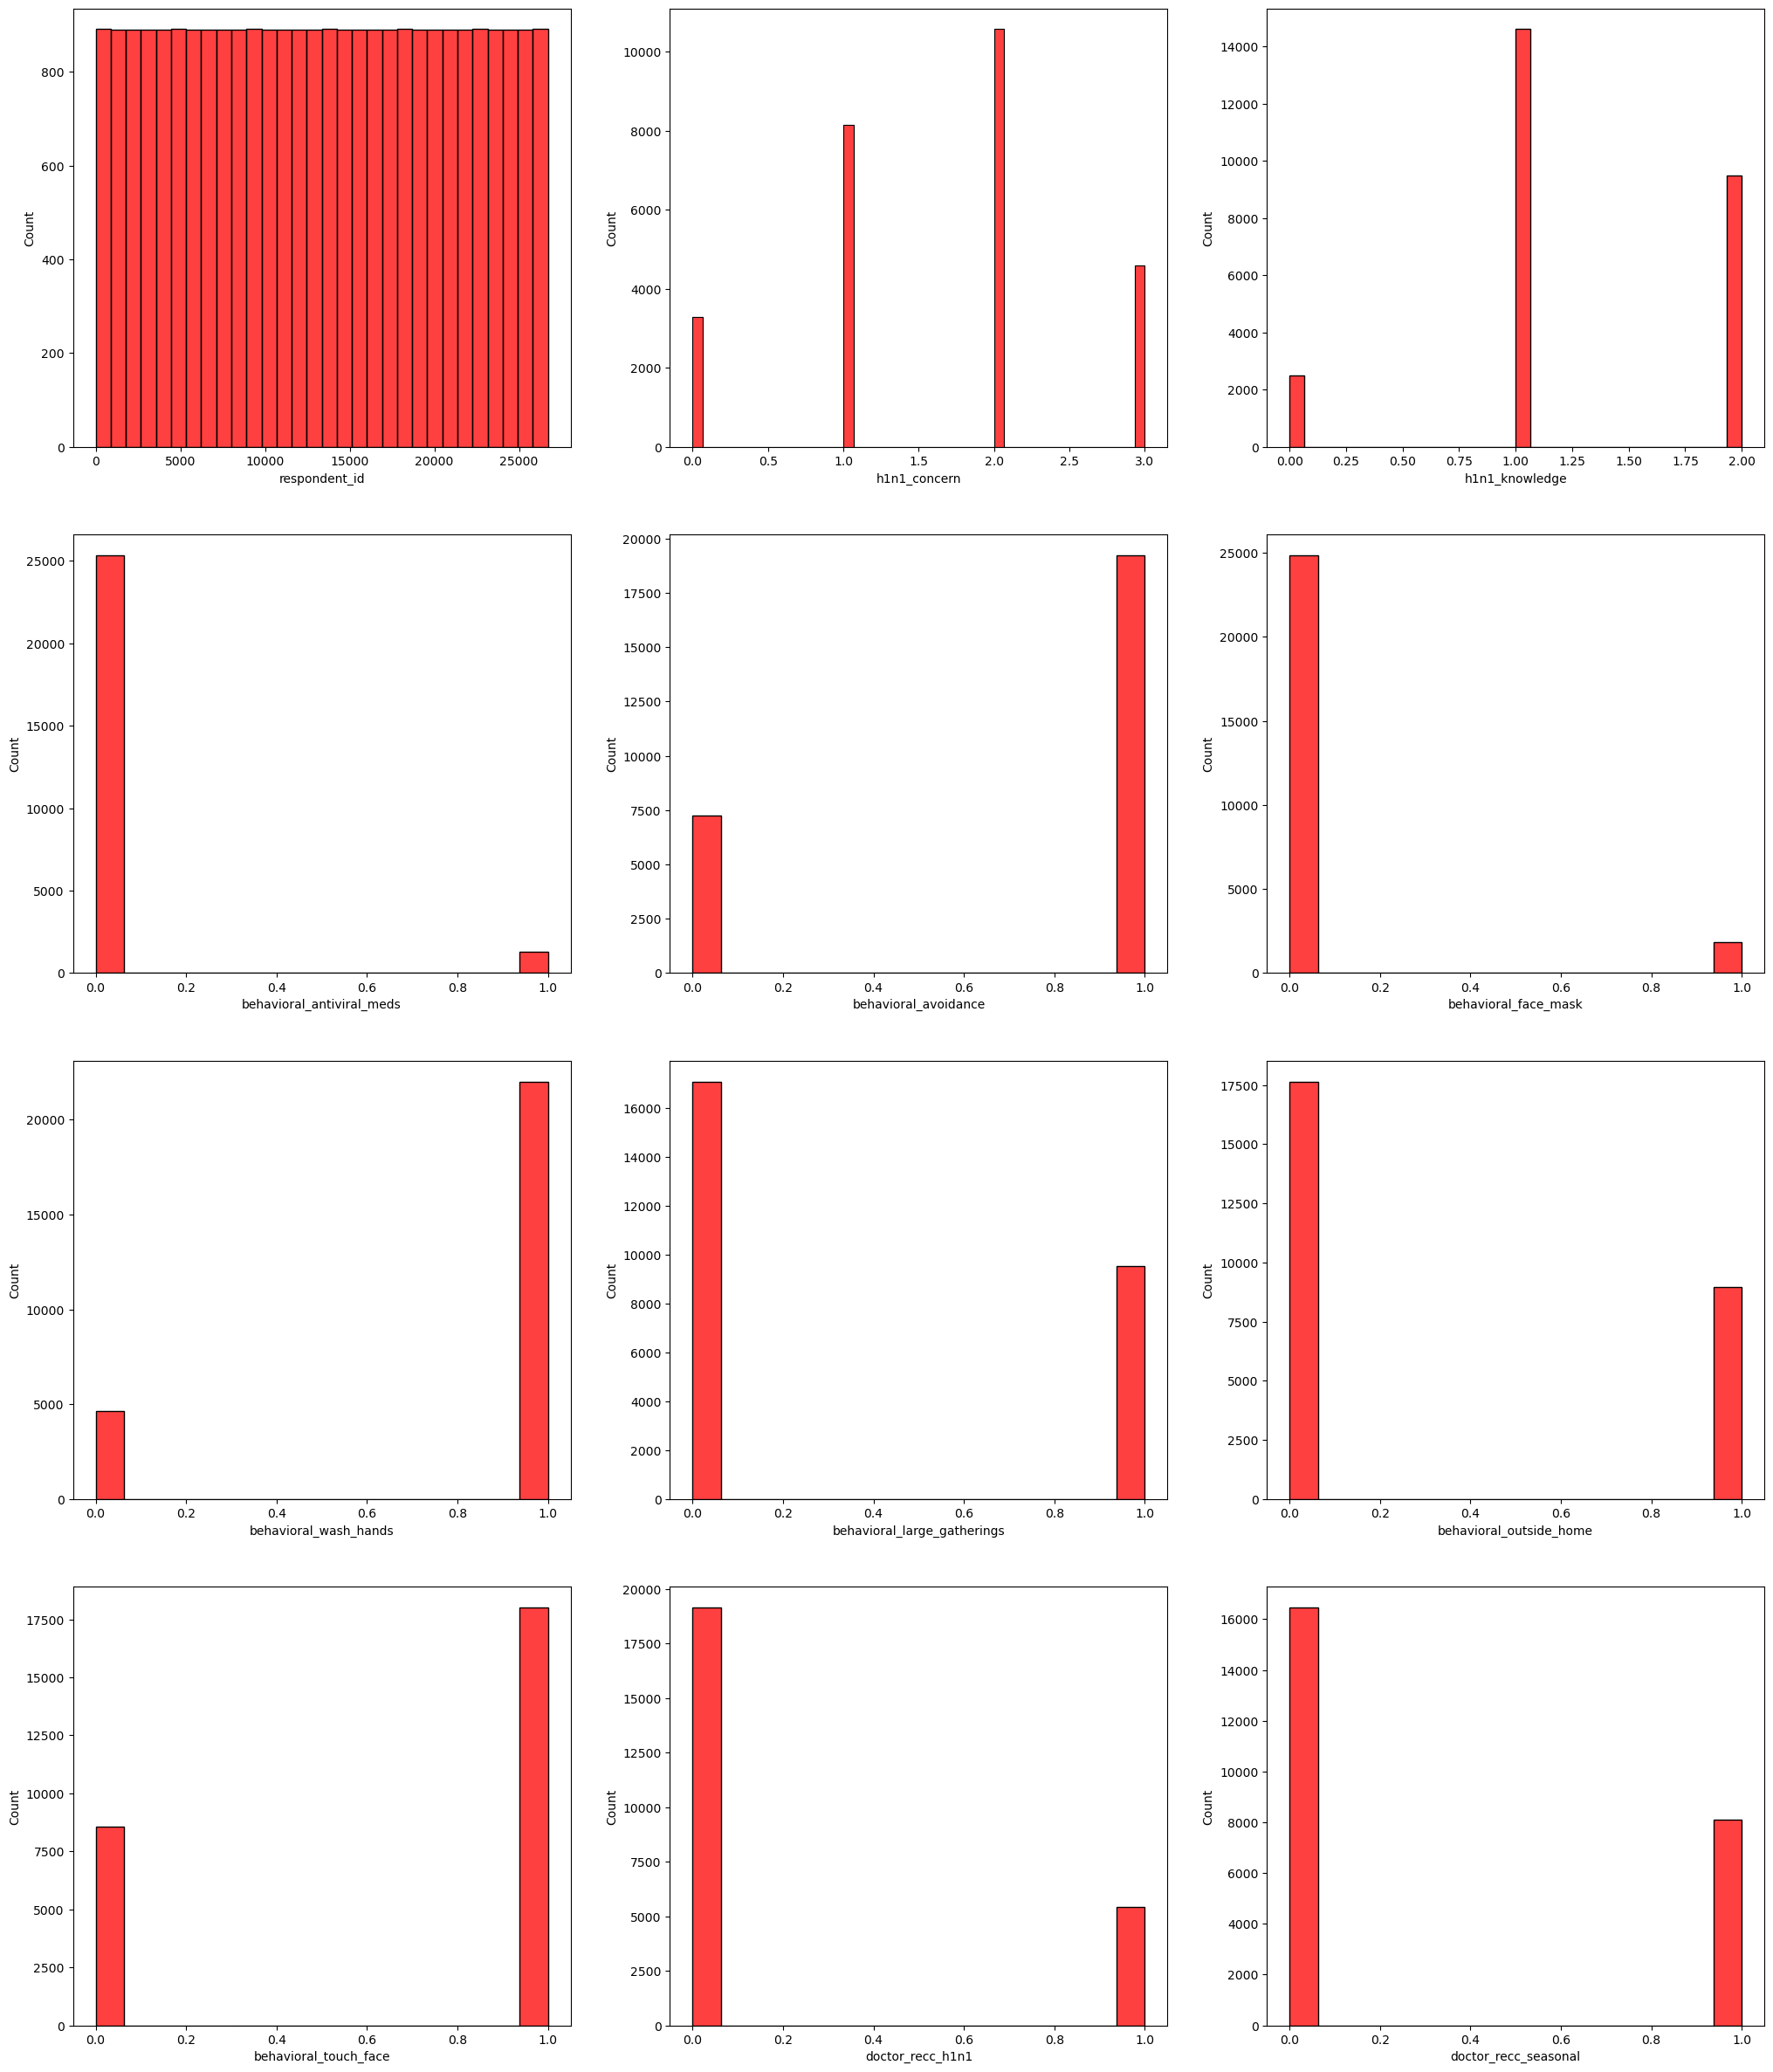

In [12]:
numeric=[]
for column in vaccinetrain:
    if is_numeric_dtype(vaccinetrain[column]):
        numeric.append(column)
fig , ax=plt.subplots(nrows = 4, ncols = 3, figsize=(25,30))
for variable, subplot in zip(numeric, ax.flatten()):
        sns.histplot(vaccinetrain[variable], ax = subplot,color="red")
plt.show()


In [14]:
vaccinetrain["data"]="train"
vaccinetest["data"]="test"

In [15]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [16]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
original=combinedf

In [19]:
mask=combinedf.isnull()

In [20]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [21]:
combinedf=combinedf.where(~mask,original)

In [22]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                53415 non-null  int64 
 1   h1n1_concern                 53238 non-null  object
 2   h1n1_knowledge               53177 non-null  object
 3   behavioral_antiviral_meds    53265 non-null  object
 4   behavioral_avoidance         52994 non-null  object
 5   behavioral_face_mask         53377 non-null  object
 6   behavioral_wash_hands        53333 non-null  object
 7   behavioral_large_gatherings  53256 non-null  object
 8   behavioral_outside_home      53251 non-null  object
 9   behavioral_touch_face        53159 non-null  object
 10  doctor_recc_h1n1             49095 non-null  object
 11  doctor_recc_seasonal         49095 non-null  object
 12  chronic_med_condition        51512 non-null  object
 13  child_under_6_months         51

In [23]:
from sklearn.experimental import enable_iterative_imputer

In [24]:
from sklearn.impute import IterativeImputer

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy="most_frequent",max_iter=10)

In [27]:
combinedf1=combinedf.drop(["respondent_id","data"],axis=1)

In [28]:
combinedf1_impute=imputer.fit_transform(combinedf1)

C:\Users\sadin\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\sadin\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [29]:
combinedf1_impute=pd.DataFrame(combinedf1_impute,columns=combinedf1.columns)

In [30]:
combinedf1_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

In [31]:
combinedf1_impute=combinedf1_impute.reset_index()

In [32]:
combinedf=combinedf.reset_index()

In [33]:
combinedf1_impute["data"]=combinedf.data

In [34]:
vaccinetraindf=combinedf1_impute[combinedf1_impute.data==1]
vaccinetestdf=combinedf1_impute[combinedf1_impute.data==0]

In [35]:
print(vaccinetestdf.shape)
print(vaccinetraindf.shape)

(26708, 37)
(26707, 37)


In [36]:
vaccinetraindf.head()

,index,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,data
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,8.0,2.0,0.0,0.0,11.0,13.0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,5.0,1.0,0.0,0.0,19.0,5.0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0,1


In [37]:
vaccinetraindf=vaccinetraindf.drop(["index","data"],axis=1)

In [38]:
vaccinetestdff=vaccinetestdf.drop(["index","data"],axis=1)

In [39]:
vaccinelables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


# HYPOTHESIS TESTING

In [40]:
# TEST NULL SEASONAL VACCINE AND SEX
pd.crosstab(vaccinelables.seasonal_vaccine,vaccinetraindf.sex)

sex,0.0,1.0
seasonal_vaccine,,
0,7970,6302
1,7888,4547


In [41]:
from scipy.stats import chi2_contingency

In [43]:
chi2_contingency(pd.crosstab(vaccinelables.seasonal_vaccine,vaccinetraindf.sex))
# p value 2.5248076319253385e-36 less than 0.05, reject null 

(158.40462897107128,
 2.5248076319253385e-36,
 1,
 array([[8474.38409406, 5797.61590594],
        [7383.61590594, 5051.38409406]]))

In [44]:
# marital status and seasonal vaccine
pd.crosstab(vaccinelables.seasonal_vaccine,vaccinetraindf.marital_status)

marital_status,0.0,1.0
seasonal_vaccine,,
0,7297,6975
1,6966,5469


In [46]:
chi2_contingency(pd.crosstab(vaccinelables.seasonal_vaccine,vaccinetraindf.marital_status))
# p value 1.4550993876983183e-15 less than 0.05, reject null

(63.691515441603656,
 1.4550993876983183e-15,
 1,
 array([[7622.02928071, 6649.97071929],
        [6640.97071929, 5794.02928071]]))

In [49]:
# SEASONAL VACCINE PRDICTION
y=vaccinelables.seasonal_vaccine
X=vaccinetraindf

<AxesSubplot: >

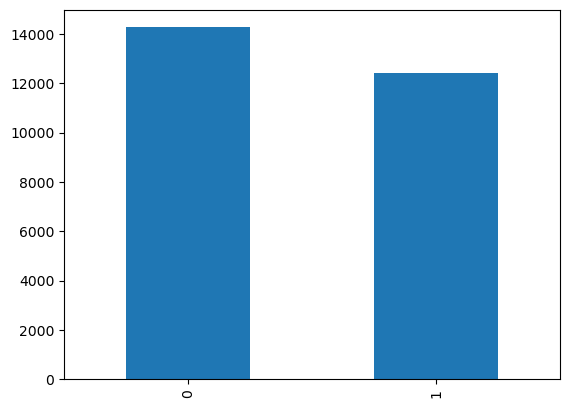

In [50]:
y.value_counts().plot(kind="bar")

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logit=LogisticRegression(max_iter=1000)

In [53]:
logitmodel=logit.fit(X,y)

In [54]:
logitmodel.score(X,y)

0.7726064327704347

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [56]:
logitpredict=logitmodel.predict(X)

In [57]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.73      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



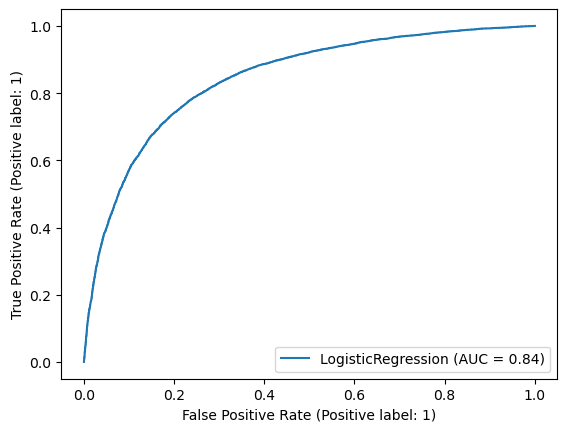

In [58]:
RocCurveDisplay.from_estimator(logit,X,y)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
tree=DecisionTreeClassifier(max_depth=10)

In [61]:
treemodel=tree.fit(X,y)

In [62]:
treemodel.score(X,y)

0.8134197026996668

In [63]:
cross_val_score(tree,X,y)

array([0.73792587, 0.74241857, 0.74517881, 0.74742558, 0.74630219])

In [64]:
treepredict=treemodel.predict(X)

In [65]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     14272
           1       0.81      0.79      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



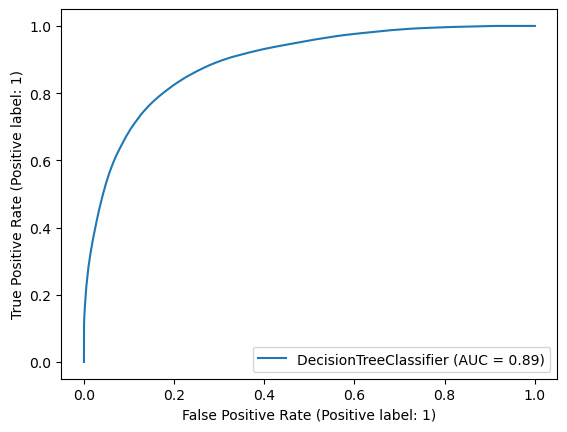

In [66]:
RocCurveDisplay.from_estimator(tree,X,y)

In [67]:
pd.DataFrame(treemodel.feature_importances_,X.columns).sort_values(by=0,ascending=False)

,0
opinion_seas_vacc_effective,0.307365
doctor_recc_seasonal,0.173585
opinion_seas_risk,0.130468
age_group,0.090617
opinion_seas_sick_from_vacc,0.028260
employment_occupation,0.025538
employment_industry,0.024620
health_worker,0.018918
hhs_geo_region,0.017155
h1n1_knowledge,0.016560


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier(n_estimators=700,max_depth=10)

In [70]:
rfmodel=rf.fit(X,y)

In [71]:
rfmodel.score(X,y)

0.8221440071891264

In [72]:
cross_val_score(rf,X,y)

array([0.7678772 , 0.77611382, 0.77625913, 0.77700805, 0.77700805])

In [73]:
rfpredict=rfmodel.predict(X)

In [74]:
print(classification_report(y,rfpredict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     14272
           1       0.82      0.79      0.80     12435

    accuracy                           0.82     26707
   macro avg       0.82      0.82      0.82     26707
weighted avg       0.82      0.82      0.82     26707



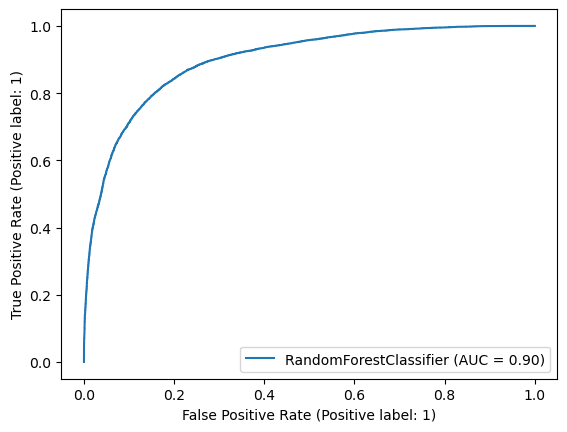

In [75]:
RocCurveDisplay.from_estimator(rf,X,y)

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gb=GradientBoostingClassifier()

In [78]:
gbmodel=gb.fit(X,y)

In [79]:
gbmodel.score(X,y)

0.7869846856629348

In [80]:
cross_val_score(gb,X,y)

array([0.77873456, 0.78360165, 0.77925482, 0.78262498, 0.77981651])

In [81]:
gbpredict=gbmodel.predict(X)

In [82]:
print(classification_report(y,gbpredict))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     14272
           1       0.78      0.76      0.77     12435

    accuracy                           0.79     26707
   macro avg       0.79      0.79      0.79     26707
weighted avg       0.79      0.79      0.79     26707



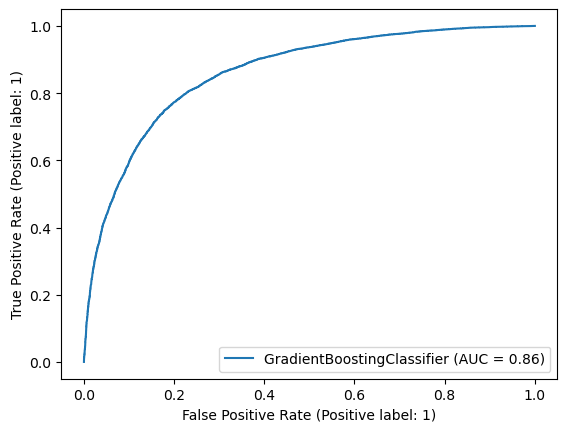

In [83]:
RocCurveDisplay.from_estimator(gb,X,y)

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                   1
17736          1             1                   1
17812          0             1                   1
17811          0             0                   1
17810          1             1                   1
                                                ..
8898           0             0                   1
8897           0             0                   1
8896           0             0                   1
8895           0             0                   1
26706          0             0                   1
Length: 26707, dtype: int64